# Requirements

In [ ]:
# Install chromium, its driver, and selenium.
!apt update
!apt install chromium-chromedriver
!pip install selenium

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd

# Configuration

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [ ]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [ ]:
# Navigate to a web page.
browser.get('https://finance.yahoo.com/crypto')

In [ ]:
# Print the page source code.
print(browser.page_source)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://finance.yahoo.com/crypto. The task includes the extraction of **Cryptocurrency names** and their **price** and **market cap**. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of the prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [ ]:
# Write your code here.

In [ ]:
# Add as many code boxes as you need.

In [3]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage') 

In [5]:
chrome = webdriver.Chrome(chrome_options)
snapshot_url = "https://finance.yahoo.com/crypto"
chrome.get(snapshot_url)

In [6]:
rows = chrome.find_elements(By.CSS_SELECTOR, "tbody.body .row")


[<selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.9A583C409784B7AE74C48365EE6F5A18.e.2883")>,
 <selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.9A583C409784B7AE74C48365EE6F5A18.e.2957")>,
 <selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.9A583C409784B7AE74C48365EE6F5A18.e.3034")>,
 <selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.9A583C409784B7AE74C48365EE6F5A18.e.3112")>,
 <selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.9A583C409784B7AE74C48365EE6F5A18.e.3189")>,
 <selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c0

In [36]:
stock_infos = []

for row in rows:
    cel_elements = row.find_elements(By.CSS_SELECTOR, "td.cell")
    title_element = cel_elements[1].find_element(By.CSS_SELECTOR, "span div")
    price_element = cel_elements[3].find_element(By.CSS_SELECTOR, "span  fin-streamer")
    market_cap_element = cel_elements[6].find_element(By.CSS_SELECTOR, "span  fin-streamer")
    title = title_element.text
    price_str=price_element.text
    price = price_str.replace(",","")
    price = float(price)
    # print(market_cap_element)
    market_cap_str = ""
    
    try:
        has_span = market_cap_element.find_element(By.CSS_SELECTOR,  "span")
        market_cap_str = has_span.text
    except :
        not_in_span = market_cap_element.text
        market_cap_str = not_in_span
    # print(market_cap_str)
    market_cap = 0
    
    if "B" in market_cap_str:
        market_cap_str = market_cap_str.replace("B", "")
        market_cap = float(market_cap_str) * 1_000_000_000
    elif "T" in market_cap_str:
        market_cap_str = market_cap_str.replace("T", "")
        market_cap = float(market_cap_str) * 1_000_000_000_000
    
    # print(market_cap)
    stock_info = {"Name":title, "Price":price, "Market Cap":market_cap}
    stock_infos.append(stock_info)
    
for stock in stock_infos:
    print(stock)
        

{'Name': 'Bitcoin USD', 'Price': 69267.49, 'Market Cap': 1370000000000.0}
{'Name': 'Ethereum USD', 'Price': 2497.9, 'Market Cap': 300770000000.0}
{'Name': 'Tether USDt USD', 'Price': 0.9991, 'Market Cap': 120465000000.0}
{'Name': 'BNB USD', 'Price': 575.6, 'Market Cap': 82977000000.0}
{'Name': 'Solana USD', 'Price': 165.63, 'Market Cap': 77964000000.0}
{'Name': 'USD Coin USD', 'Price': 1.0, 'Market Cap': 34700000000.0}
{'Name': 'XRP USD', 'Price': 0.5183, 'Market Cap': 29476000000.0}
{'Name': 'Lido Staked ETH USD', 'Price': 2503.79, 'Market Cap': 24429000000.0}
{'Name': 'Dogecoin USD', 'Price': 0.1581, 'Market Cap': 23182000000.0}
{'Name': 'Wrapped TRON USD', 'Price': 0.167321, 'Market Cap': 14628000000.0}
{'Name': 'TRON USD', 'Price': 0.1669, 'Market Cap': 14432000000.0}
{'Name': 'Toncoin USD', 'Price': 4.8523, 'Market Cap': 12344000000.0}
{'Name': 'Cardano USD', 'Price': 0.3453, 'Market Cap': 12085000000.0}
{'Name': 'Lido wstETH USD', 'Price': 2962.39, 'Market Cap': 11099000000.0}
{'

In [38]:
df = pd.DataFrame(stock_infos)
df

,Name,Price,Market Cap
0,Bitcoin USD,69267.490000,1.370000e+12
1,Ethereum USD,2497.900000,3.007700e+11
2,Tether USDt USD,0.999100,1.204650e+11
3,BNB USD,575.600000,8.297700e+10
4,Solana USD,165.630000,7.796400e+10
5,USD Coin USD,1.000000,3.470000e+10
6,XRP USD,0.518300,2.947600e+10
7,Lido Staked ETH USD,2503.790000,2.442900e+10
8,Dogecoin USD,0.158100,2.318200e+10
9,Wrapped TRON USD,0.167321,1.462800e+10


array([[<Axes: title={'center': 'Price'}>]], dtype=object)

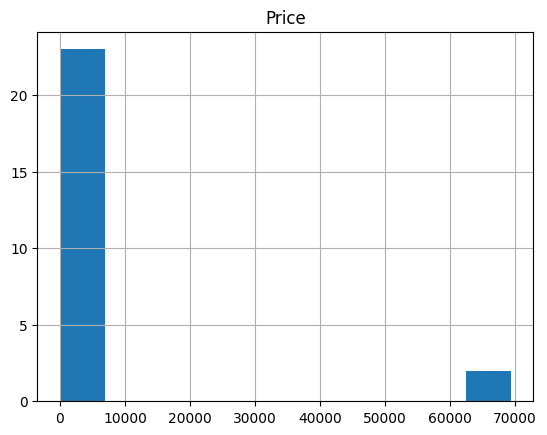

In [45]:
df.drop(columns="Market Cap").hist(bins=10)

# Laboratory Exercise - Bonus Task (+ 2 points)

The additional task involves clicking on the symbol for BTC-USD and on the new page that appears click on the **Historical data**. You will extract the prices and market caps for the BTC-USD only, and make line plot for the price data.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [ ]:
# Write your code here.

In [ ]:
# Add as many code boxes as you need.

In [47]:
link = rows[0].find_element(By.CSS_SELECTOR, "td span div a")
print(link)
link.click()

<selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.9A583C409784B7AE74C48365EE6F5A18.e.2887")>


In [49]:
nav_bar_element = chrome.find_element(By.CSS_SELECTOR, "ul.nav-list")
print(nav_bar_element)

<selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.5E67D72354049FC9909139EA93DBBB79.e.52507")>


In [51]:
li_links_elements = nav_bar_element.find_elements(By.CSS_SELECTOR, "li")
li_links_elements

[<selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.5E67D72354049FC9909139EA93DBBB79.e.52508")>,
 <selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.5E67D72354049FC9909139EA93DBBB79.e.52512")>,
 <selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.5E67D72354049FC9909139EA93DBBB79.e.52516")>,
 <selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.5E67D72354049FC9909139EA93DBBB79.e.52520")>,
 <selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.5E67D72354049FC9909139EA93DBBB79.e.52524")>,
 <selenium.webdriver.remote.webelement.WebElement (session="74882ce27e

In [53]:
history_data_a_element = li_links_elements[-2].find_element(By.CSS_SELECTOR, "a")
history_data_a_element

<selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.5E67D72354049FC9909139EA93DBBB79.e.52525")>

In [54]:
history_data_a_element.click()

In [55]:
bitcoin_rows = chrome.find_elements(By.CSS_SELECTOR, "table.table tbody tr")
bitcoin_rows

[<selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.85D4446145E42531134957E873F4432E.e.66219")>,
 <selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.85D4446145E42531134957E873F4432E.e.66231")>,
 <selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.85D4446145E42531134957E873F4432E.e.66243")>,
 <selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.85D4446145E42531134957E873F4432E.e.66255")>,
 <selenium.webdriver.remote.webelement.WebElement (session="74882ce27eb59c09f7ef04ae4b253733", element="f.34BC102A7BCC52E05EC0F1B4C8A0CD4D.d.85D4446145E42531134957E873F4432E.e.66267")>,
 <selenium.webdriver.remote.webelement.WebElement (session="74882ce27e

In [59]:
b_infos = []
for b_row in bitcoin_rows:
    b_cells = b_row.find_elements(By.CSS_SELECTOR, "td")
    close = b_cells[4].text
    volume = b_cells[6].text
    b_info = {"Close":close, "Volume":volume}
    b_infos.append(b_info)

for b_info in b_infos:
    print(b_info)

{'Close': '69,438.94', 'Volume': '45,839,867,904'}
{'Close': '70,215.19', 'Volume': '40,627,912,076'}
{'Close': '72,339.54', 'Volume': '40,646,637,831'}
{'Close': '72,720.49', 'Volume': '58,541,874,402'}
{'Close': '69,907.76', 'Volume': '38,799,856,657'}
{'Close': '67,929.30', 'Volume': '16,721,307,878'}
{'Close': '67,014.70', 'Volume': '19,588,098,156'}
{'Close': '66,642.41', 'Volume': '41,469,984,306'}
{'Close': '68,161.05', 'Volume': '31,414,428,647'}
{'Close': '66,432.20', 'Volume': '32,263,980,353'}
{'Close': '67,361.41', 'Volume': '31,808,472,566'}
{'Close': '67,367.85', 'Volume': '37,498,611,780'}
{'Close': '69,001.70', 'Volume': '18,975,847,518'}
{'Close': '68,362.73', 'Volume': '14,443,497,908'}
{'Close': '68,418.79', 'Volume': '36,857,165,014'}
{'Close': '67,399.84', 'Volume': '32,790,898,511'}
{'Close': '67,612.72', 'Volume': '38,195,189,534'}
{'Close': '67,041.11', 'Volume': '48,863,870,879'}
{'Close': '66,046.13', 'Volume': '43,706,958,056'}
{'Close': '62,851.38', 'Volume'

In [65]:
b_df = pd.DataFrame(b_infos)

In [66]:
b_df

,Close,Volume
0,"69,438.94","45,839,867,904"
1,"70,215.19","40,627,912,076"
2,"72,339.54","40,646,637,831"
3,"72,720.49","58,541,874,402"
4,"69,907.76","38,799,856,657"
...,...,...
362,"35,049.36","12,412,743,996"
363,"35,082.20","9,561,294,264"
364,"34,732.32","17,158,456,701"
365,"34,938.24","20,998,158,544"


In [62]:
from VNP.packages.visualization import *

In [67]:
px.line(b_df,
    x='Close',
    y="Volume",
    title='Close by Volume',
    width=800,
    height=700)